In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap




In [27]:
dataset=pd.read_csv("C:/Users/RGUKT/Desktop/weather.csv")
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      363 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       365 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12), int64(5), object(5)
memory usage: 63.0+ KB


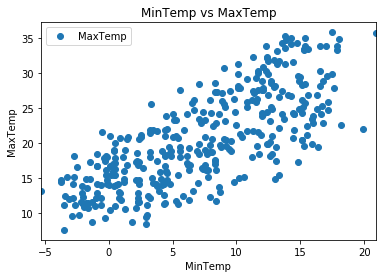

In [29]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

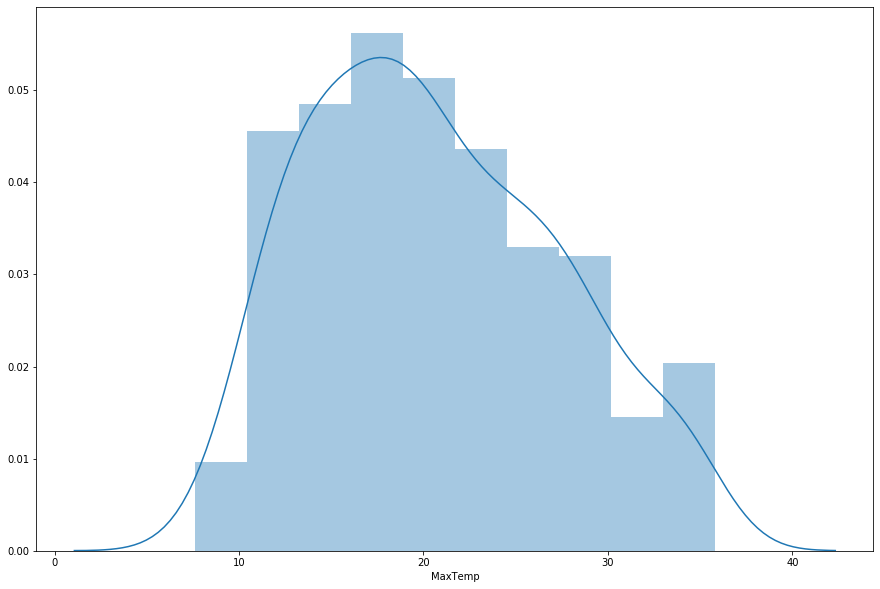

In [33]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['MaxTemp'])

In [34]:
dataset.plot??

In [50]:
X=dataset['MinTemp'].values.reshape(-1,1)
Y=dataset['MaxTemp'].values.reshape(-1,1)

In [51]:
Y

array([[24.3],
       [26.9],
       [23.4],
       [15.5],
       [16.1],
       [16.9],
       [18.2],
       [17. ],
       [19.5],
       [22.8],
       [25.2],
       [27.3],
       [27.9],
       [30.9],
       [31.2],
       [32.1],
       [31.2],
       [30. ],
       [32.3],
       [33.4],
       [33.4],
       [19.4],
       [18.5],
       [24.3],
       [28.4],
       [26.9],
       [22.2],
       [28. ],
       [24.3],
       [24.1],
       [20.4],
       [26.3],
       [24.2],
       [26.5],
       [21.8],
       [26.8],
       [25.8],
       [28.2],
       [29.4],
       [24.8],
       [18.5],
       [21.5],
       [20.3],
       [27.1],
       [29.9],
       [21.1],
       [21.7],
       [20.9],
       [21. ],
       [23.1],
       [29.5],
       [22. ],
       [20.4],
       [24.4],
       [21.7],
       [26.3],
       [26.7],
       [28.3],
       [31.6],
       [35. ],
       [33.5],
       [34.2],
       [35. ],
       [23.4],
       [25.3],
       [27.5],
       [34

In [52]:
X

array([[ 8. ],
       [14. ],
       [13.7],
       [13.3],
       [ 7.6],
       [ 6.2],
       [ 6.1],
       [ 8.3],
       [ 8.8],
       [ 8.4],
       [ 9.1],
       [ 8.5],
       [10.1],
       [12.1],
       [10.1],
       [12.4],
       [13.8],
       [11.7],
       [12.4],
       [15.6],
       [15.3],
       [16.4],
       [12.8],
       [12. ],
       [15.4],
       [15.6],
       [13.3],
       [12.9],
       [15.1],
       [13.6],
       [15.1],
       [11.6],
       [16.6],
       [13.3],
       [14.5],
       [16.3],
       [17.2],
       [16.5],
       [15. ],
       [14.9],
       [11.8],
       [11.7],
       [ 9.6],
       [ 8.9],
       [10.1],
       [15.5],
       [10.8],
       [ 7.5],
       [12.8],
       [12.6],
       [14.8],
       [19.9],
       [ 9.2],
       [12.4],
       [11.3],
       [ 9.8],
       [14.3],
       [15.1],
       [14.4],
       [15.4],
       [13.8],
       [13.6],
       [14.3],
       [15.9],
       [16.7],
       [12.1],
       [14

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [66]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
print(regressor.intercept_)
print(regressor.coef_)

[14.56202411]
[[0.81953755]]


In [68]:
Y_pred=regressor.predict(X_test)

In [69]:
df=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


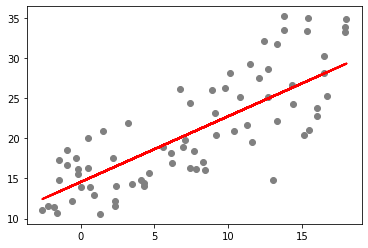

In [70]:
plt.scatter(X_test,Y_test,color='gray')
plt.plot(X_test,Y_pred,color='red',linewidth=2)
plt.show()

In [72]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Square Error:',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error: 3.5094353112899594
Mean Square Error: 17.011877668640622
Root Mean Squared Error: 4.124545753006096
